# Lib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import datetime
import matplotlib.dates as mdates

from matplotlib.animation import FuncAnimation
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

# variables & params

In [2]:
plt.style.use("Solarize_Light2")

In [3]:
# fontstyle

# import data and geodata

In [4]:
df = pd.read_csv("datos/vacunacion_municipios_bo.csv", index_col=0)
df.fecha = pd.to_datetime(df.fecha)
df[df.municipio.str.contains("Sant")]

fecha  cod_ine                municipio departamento  dosis  \
132  2021-10-23    20308      Santiago De Callapa       La Paz      1   
133  2021-10-23    20308      Santiago De Callapa       La Paz      2   
134  2021-10-30    20308      Santiago De Callapa       La Paz      1   
135  2021-10-30    20308      Santiago De Callapa       La Paz      2   
136  2021-11-13    20308      Santiago De Callapa       La Paz      1   
...         ...      ...                      ...          ...    ...   
3902 2021-11-20    70101  Santa Cruz de la Sierra   Santa Cruz      2   
3903 2021-11-27    70101  Santa Cruz de la Sierra   Santa Cruz      1   
3904 2021-11-27    70101  Santa Cruz de la Sierra   Santa Cruz      2   
3905 2021-12-04    70101  Santa Cruz de la Sierra   Santa Cruz      1   
3906 2021-12-04    70101  Santa Cruz de la Sierra   Santa Cruz      2   

      porcentaje  
132           19  
133           16  
134           20  
135           17  
136           22  
...          ...  
3902          66  
3903          80  
3904          69  
3905          82  
3906          70  

[144 rows x 6 columns]

In [5]:
sdsn = pd.read_csv("other/sdsn/sdsn.csv")

sdsn

Código              Municipio Departamento  \
0     10101                  Sucre   Chuquisaca   
1     10102                 Yotala   Chuquisaca   
2     10103                 Poroma   Chuquisaca   
3     10201                Azurduy   Chuquisaca   
4     10202                Tarvita   Chuquisaca   
..      ...                    ...          ...   
334   90401             Santa Rosa        Pando   
335   90402                 Ingavi        Pando   
336   90501        Nueva Esperanza        Pando   
337   90502  Villa Nueva-Loma Alta        Pando   
338   90503         Santos Mercado        Pando   

     Índice Municipal de Desarrollo Sostenible  Ranking del Índice de Bolivia  \
0                                         69.6                              5   
1                                         55.5                             75   
2                                         35.7                            339   
3                                         37.9                            333   
4                                         40.0                            327   
..                                         ...                            ...   
334                                       48.2                            217   
335                                       43.6                            295   
336                                       46.0                            273   
337                                       43.0                            305   
338                                       40.9                            318   

     Población 2020  Tasa de urbanización, 2012 (% de población)  \
0            295476                                         91.4   
1             10017                                          0.0   
2             18947                                          0.0   
3             10948                                          0.0   
4             14688                                          0.0   
..              ...                                          ...   
334            2506                                          0.0   
335            1840                                          0.0   
336            2422                                          0.0   
337            3209                                          0.0   
338            2506                                          0.0   

    Tasa de pobreza energética extrema, 2016 (% de viviendas)  \
0                                                 23.8          
1                                                 45.8          
2                                                 96.1          
3                                                 86.8          
4                                                 86.1          
..                                                 ...          
334                                                  .          
335                                                  .          
336                                                  .          
337                                                  .          
338                                                  .          

    Número de viviendas que consumen menos del 25% del límite de Tarifa Dignidad (210 kWh/año), 2016  \
0                                                17473                                                 
1                                                 1229                                                 
2                                                 4839                                                 
3                                                 2199                                                 
4                                                 2935                                                 
..                                                 ...                                                 
334                                                  .                                       

In [6]:
casos = pd.read_csv("https://github.com/dquintani/covid/blob/main/casos_municipios_completo.csv?raw=true", index_col=0)
casos

fecha  cod_ine                 municipio  confirmados  \
0      2020-03-19    20101  Nuestra Señora de La Paz            1   
1      2020-03-24    20101  Nuestra Señora de La Paz            1   
2      2020-03-25    20101  Nuestra Señora de La Paz            1   
3      2020-03-26    20101  Nuestra Señora de La Paz            2   
4      2020-03-28    20101  Nuestra Señora de La Paz            1   
...           ...      ...                       ...          ...   
36235  2021-04-23    90402                    Ingavi            3   
36236  2021-04-26    90402                    Ingavi            1   
36237  2021-05-24    90402                    Ingavi            2   
36238  2021-06-07    90402                    Ingavi            2   
36239  2021-11-12    90402                    Ingavi            1   

      departamento  poblacion  
0           La Paz     816044  
1           La Paz     816044  
2           La Paz     816044  
3           La Paz     816044  
4           La Paz     816044  
...            ...        ...  
36235        Pando       1840  
36236        Pando       1840  
36237        Pando       1840  
36238        Pando       1840  
36239        Pando       1840  

[36240 rows x 6 columns]

### geo maps

In [7]:
df_map = gpd.read_file("other/geo/municipios.339.geojson")
df_map['CODIGO'] = df_map['CODIGO'].str[1:]
df_map = df_map.rename(columns={"CODIGO": "cod_ine"})
df_map["cod_ine"] = df_map["cod_ine"].astype(float)

display(df_map)
df_map.plot

MUNICIPIO            name  cod_ine  rmapshaperid  \
0         Esmeralda       Esmeralda  40505.0             0   
1         Quillacas       Quillacas  40202.0             1   
2    Pampa Aullagas  Pampa Aullagas  40802.0             2   
3         Llallagua       Llallagua  50203.0             3   
4          Caripuyo        Caripuyo  50702.0             4   
..              ...             ...      ...           ...   
339        Pasorapa        Pasorapa  30202.0           339   
340       Cotagaita       Cotagaita  50601.0           340   
341         Camargo         Camargo  10701.0           341   
342        Villazón        Villazón  51501.0           342   
343         Padcaya         Padcaya  60201.0           343   

                                              geometry  
0    POLYGON ((-68.26700 -18.81620, -68.23940 -18.8...  
1    POLYGON ((-66.50210 -19.35990, -66.54580 -19.3...  
2    POLYGON ((-67.05310 -19.09030, -67.05150 -19.1...  
3    POLYGON ((-66.41650 -18.25900, -66.41590 -18.2...  
4    POLYGON ((-66.52390 -18.08950, -66.51240 -18.0...  
..                                                 ...  
339  POLYGON ((-64.69980 -18.08970, -64.69190 -18.0...  
340  POLYGON ((-65.55440 -20.29200, -65.55710 -20.3...  
341  POLYGON ((-64.86470 -20.49130, -64.86870 -20.5...  
342  POLYGON ((-65.39070 -21.84670, -65.38950 -21.8...  
343  POLYGON ((-64.36040 -21.82250, -64.35710 -21.8...  

[344 rows x 5 columns]

# data manipulation

## add poblacion

In [8]:
#only population
sdsn = sdsn.loc[:,["Código", "Población 2020"]]

#merge
df = df.merge(sdsn, left_on="cod_ine", right_on="Código")

#consolidate
df = df.drop("Código", axis=1) 
df = df.rename({"Población 2020": "poblacion2020"}, axis=1)
df_pop = df.pop("poblacion2020")
df.insert(4,"poblacion2020", df_pop)

df

fecha  cod_ine municipio departamento  poblacion2020  dosis  \
0    2021-10-23    20503  Aucapata       La Paz           5771      1   
1    2021-10-23    20503  Aucapata       La Paz           5771      2   
2    2021-10-30    20503  Aucapata       La Paz           5771      1   
3    2021-10-30    20503  Aucapata       La Paz           5771      2   
4    2021-11-13    20503  Aucapata       La Paz           5771      1   
...         ...      ...       ...          ...            ...    ...   
4046 2021-11-20    70706    Camiri   Santa Cruz          36485      2   
4047 2021-11-27    70706    Camiri   Santa Cruz          36485      1   
4048 2021-11-27    70706    Camiri   Santa Cruz          36485      2   
4049 2021-12-04    70706    Camiri   Santa Cruz          36485      1   
4050 2021-12-04    70706    Camiri   Santa Cruz          36485      2   

      porcentaje  
0             10  
1              9  
2             10  
3              9  
4             13  
...          ...  
4046          92  
4047          98  
4048          92  
4049          99  
4050          93  

[4051 rows x 7 columns]

## create dataframe formats

### long (default)

In [9]:
df

fecha  cod_ine municipio departamento  poblacion2020  dosis  \
0    2021-10-23    20503  Aucapata       La Paz           5771      1   
1    2021-10-23    20503  Aucapata       La Paz           5771      2   
2    2021-10-30    20503  Aucapata       La Paz           5771      1   
3    2021-10-30    20503  Aucapata       La Paz           5771      2   
4    2021-11-13    20503  Aucapata       La Paz           5771      1   
...         ...      ...       ...          ...            ...    ...   
4046 2021-11-20    70706    Camiri   Santa Cruz          36485      2   
4047 2021-11-27    70706    Camiri   Santa Cruz          36485      1   
4048 2021-11-27    70706    Camiri   Santa Cruz          36485      2   
4049 2021-12-04    70706    Camiri   Santa Cruz          36485      1   
4050 2021-12-04    70706    Camiri   Santa Cruz          36485      2   

      porcentaje  
0             10  
1              9  
2             10  
3              9  
4             13  
...          ...  
4046          92  
4047          98  
4048          92  
4049          99  
4050          93  

[4051 rows x 7 columns]

### wide

In [10]:
df_wide = df.pivot_table(index=['fecha', "cod_ine", "municipio","departamento","poblacion2020"], columns='dosis', values='porcentaje',
               # aggfunc='sum', fill_value=''
              ).reset_index()
df_wide

dosis      fecha  cod_ine                      municipio departamento  \
0     2021-10-23    10101                          Sucre   Chuquisaca   
1     2021-10-23    10102                         Yotala   Chuquisaca   
2     2021-10-23    10103                         Poroma   Chuquisaca   
3     2021-10-23    10201                        Azurduy   Chuquisaca   
4     2021-10-23    10202                        Tarvita   Chuquisaca   
...          ...      ...                            ...          ...   
2024  2021-12-04    90401  Nacebe (Santa Rosa Del Abuna)        Pando   
2025  2021-12-04    90402               Ingavi (Humaita)        Pando   
2026  2021-12-04    90501  Nuevo Manoa (Nueva Esperanza)        Pando   
2027  2021-12-04    90502        Villa Nueva (Loma Alta)        Pando   
2028  2021-12-04    90503        Eureka (Santos Mercado)        Pando   

dosis  poblacion2020     1     2  
0             295476  85.0  70.0  
1              10017  49.0  46.0  
2              18947  20.0  13.0  
3              10948  37.0  30.0  
4              14688  20.0  17.0  
...              ...   ...   ...  
2024            2506  65.0  52.0  
2025            1840  42.0  26.0  
2026            2422  43.0  30.0  
2027            3209  61.0  44.0  
2028            2506  52.0  37.0  

[2029 rows x 7 columns]

### single df for each dose

In [11]:
df_primeras = df[df.dosis==1]
# display(df_primeras)
df_segundas = df[df.dosis==2]
# display(df_segundas)

# PARAMETERS

In [12]:
latest_date = df.sort_values("fecha")
latest_date = latest_date.fecha.iloc[-1].date()
print(str(latest_date))

2021-12-04


In [13]:
list_dates = df.sort_values("fecha").fecha.unique()
list(list_dates)

[numpy.datetime64('2021-10-23T00:00:00.000000000'),
 numpy.datetime64('2021-10-30T00:00:00.000000000'),
 numpy.datetime64('2021-11-13T00:00:00.000000000'),
 numpy.datetime64('2021-11-20T00:00:00.000000000'),
 numpy.datetime64('2021-11-27T00:00:00.000000000'),
 numpy.datetime64('2021-12-04T00:00:00.000000000')]

In [14]:
list_mun = df.sort_values("poblacion2020", ascending=False).municipio.unique()
list_dptm = df.sort_values("poblacion2020", ascending=False).departamento.unique()

In [37]:
df = df.sort_values("poblacion2020", ascending=False)
mun_dict = dict(zip(df.cod_ine,df.municipio))

# EXPLORACIÓN

In [38]:
for i in mun_dict.keys():
    if len(df[df.cod_ine==i]) != 10:
        dfx = df[df.cod_ine==i]
        print(i,mun_dict[i], "--", len(dfx))
    

70101 Santa Cruz de la Sierra -- 12
20105 El Alto -- 12
20101 La Paz -- 12
30101 Cochabamba -- 12
40101 Oruro -- 11
10101 Sucre -- 12
60101 Tarija -- 12
50101 Potosí -- 12
70201 Warnes -- 12
31001 Sacaba -- 12
70104 La Guardia -- 12
30901 Quillacollo -- 12
71001 Montero -- 12
80101 Trinidad -- 12
60301 Yacuiba -- 12
80201 Riberalta -- 12
20801 Viacha -- 12
31003 Villa Tunari -- 12
90101 Cobija -- 12
70403 Yapacani -- 12
71104 San Julian -- 12
30903 Tiquipaya -- 12
70105 El Torno -- 12
70301 San Ignacio De Velasco -- 12
30904 Vinto -- 12
30905 Colcapirhua -- 12
70102 Cotoca -- 12
22001 Caranavi -- 12
31205 Puerto Villarroel -- 12
60303 Villamontes -- 12
51501 Villazon -- 12
50801 Tupiza -- 12
70502 Pailon -- 12
20201 Achacachi -- 12
30902 Sipe Sipe -- 12
70501 San Jose De Chiquitos -- 12
80302 San Borja -- 12
50203 Llallagua -- 12
21105 La Asunta -- 12
70702 Charagua -- 12
60202 Bermejo -- 12
51201 Uyuni -- 12
70706 Camiri -- 12
71501 Ascencion De Guarayos -- 12
31206 Entre Rios -- 12
5

In [39]:
df[df.municipio=="S.P.De Quemes"]

fecha  cod_ine      municipio departamento  poblacion2020  dosis  \
1726 2021-10-30    50902  S.P.De Quemes       Potosí           1289      2   
1723 2021-10-23    50902  S.P.De Quemes       Potosí           1289      1   
1725 2021-10-30    50902  S.P.De Quemes       Potosí           1289      1   
1724 2021-10-23    50902  S.P.De Quemes       Potosí           1289      2   

      porcentaje  
1726          26  
1723          36  
1725          36  
1724          26

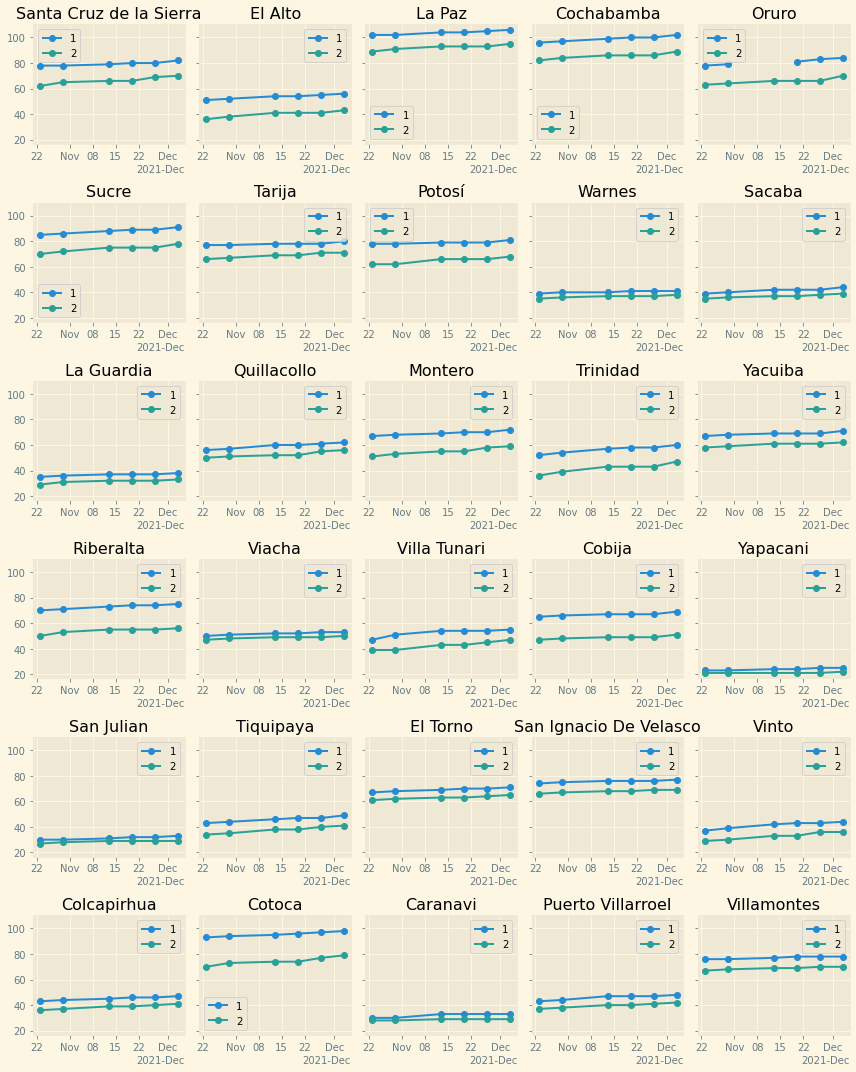

In [41]:
fig, axs = plt.subplots(6,5, figsize=(12,15), sharey=True)
axs = axs.flatten()

# mun = list_mun[:60]
mun = list(mun_dict.keys())[:30]
for i in range(len(mun)):
    df_mun = df_wide[df_wide.cod_ine==mun[i]]
    
    axs[i].set_title(list(mun_dict.values())[i])
    
    axs[i].plot(pd.to_datetime(df_mun.fecha), df_mun[1],#.diff(), 
                label="1", marker="o")
    axs[i].plot(pd.to_datetime(df_mun.fecha), df_mun[2],#.diff(), 
                label="2", marker="o")
    
    # axs[i].set_ylim(0,140)
    # axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    axs[i].xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs[i].xaxis.get_major_locator()))
    # axs[i].axhline(100, color="black", linestyle="--")
    axs[i].legend()
    
fig.tight_layout()

In [19]:
#huayllamarca, san matias, boyuibe

/tmp/ipykernel_25591/4058614923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_25591/4058614923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)


Huayllamarca


/tmp/ipykernel_25591/4058614923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_25591/4058614923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)


Boyuibe
San Matias


/tmp/ipykernel_25591/4058614923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_25591/4058614923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
/tmp/ipykernel_25591/4058614923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

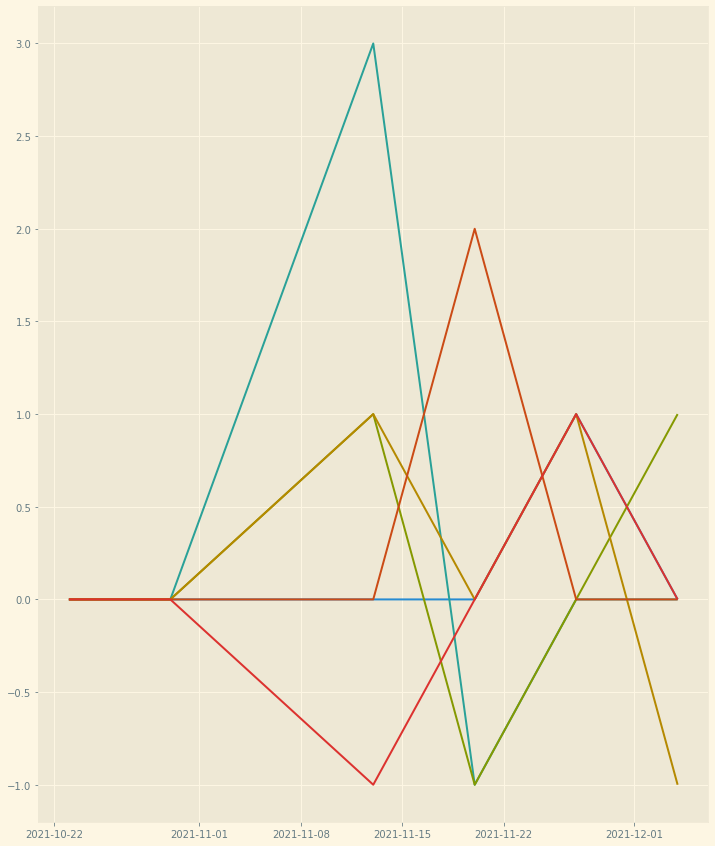

In [20]:
fig, axs = plt.subplots(1,1, figsize=(12,15))
# axs = axs.flatten()

mun = list_mun#[:10]
mun = list(mun_dict.keys())#[:60]

for i in range(len(mun)):
    df_mun = df_wide[df_wide.cod_ine==mun[i]]
    df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
    df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
    # numerical_columns = ["1_diff", "2_diff"]
    # df_mun[df_mun[numerical_columns] < 0].count()
    if len(df_mun[df_mun["diff2"]<0])>0:
        print(mun_dict[mun[i]])
        x = df_mun.fecha
        y1 = df_mun["diff1"]
        y2 = df_mun["diff2"]
        axs.plot(x, y1, label=mun[i])
        axs.plot(x, y2, label=mun[i])
    # axs.legend()
    # print(mun[i])
    # axs.plot

In [21]:
df_wide[df_wide.municipio=="Boyuibe"]

dosis      fecha  cod_ine municipio departamento  poblacion2020     1     2
275   2021-10-23    70707   Boyuibe   Santa Cruz           6154  73.0  71.0
614   2021-10-30    70707   Boyuibe   Santa Cruz           6154  73.0  71.0
952   2021-11-13    70707   Boyuibe   Santa Cruz           6154  74.0  72.0
1290  2021-11-20    70707   Boyuibe   Santa Cruz           6154  73.0  72.0
1628  2021-11-27    70707   Boyuibe   Santa Cruz           6154  73.0  73.0
1966  2021-12-04    70707   Boyuibe   Santa Cruz           6154  74.0  72.0

# GRAFICAS

### original graph

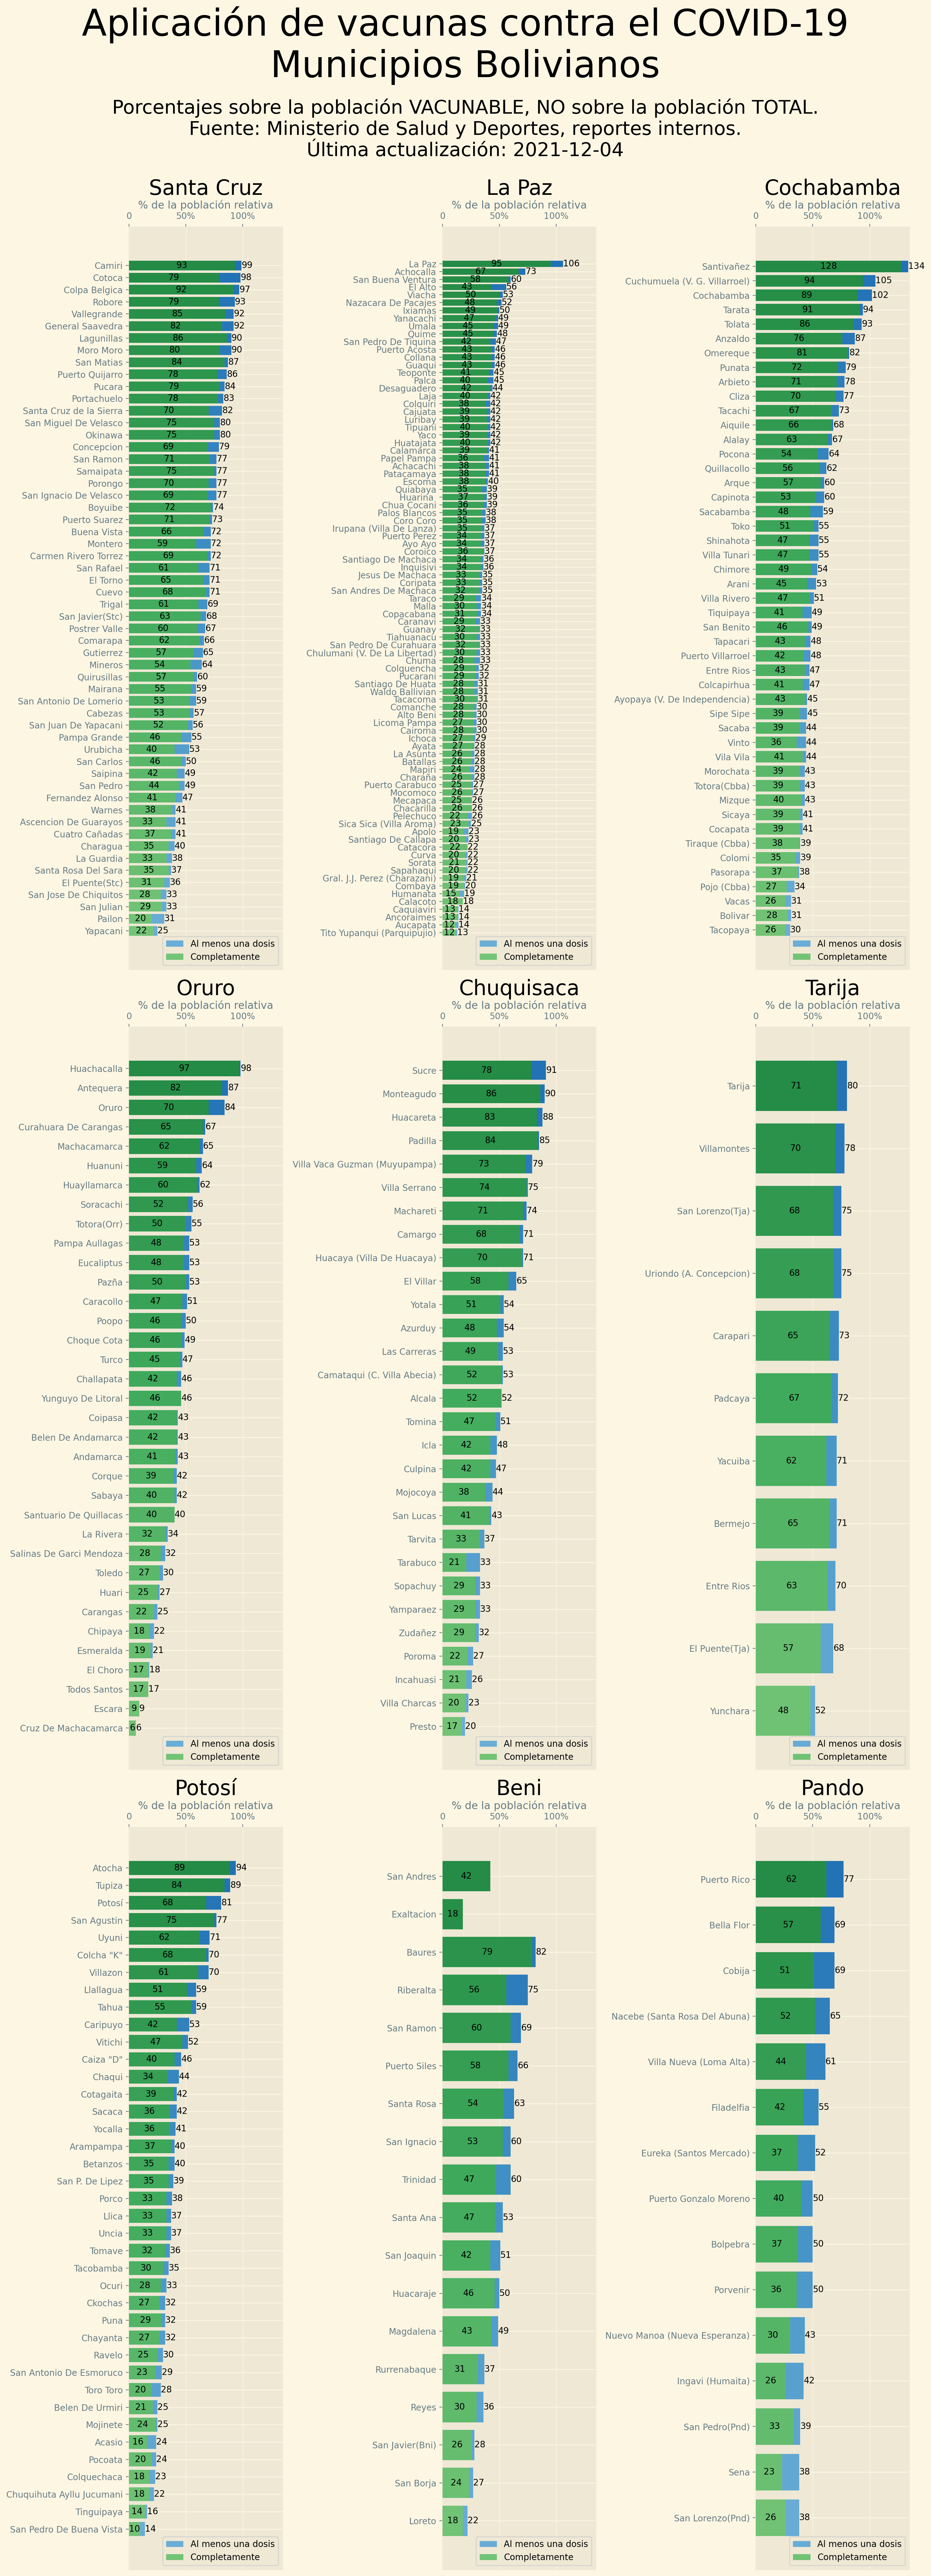

In [22]:
dff = df_wide[df_wide.fecha==str(latest_date)]

### ---

fig, axs = plt.subplots(3,3,figsize = (15,40), dpi=200)
axs = axs.flatten()

fig.suptitle("Aplicación de vacunas contra el COVID-19\nMunicipios Bolivianos", fontsize=42, y=1.03)
fig.text(.5,.97,s="Porcentajes sobre la población VACUNABLE, NO sobre la población TOTAL.\nFuente: Ministerio de Salud y Deportes, reportes internos.\nÚltima actualización: {}".format(str(latest_date)), ha="center", fontsize=22)

# list_dptm = dff.departamento.unique()
# list_dptm = [x for x in list_dptm if type(x) == str]

for i in range(9):
    dfx = dff
    dfx = dff[dff.departamento==list_dptm[i]]
    dfx = dfx.set_index("municipio").sort_values(1, ascending=True)
    # display(dfx)
    
    axs[i].set_title(list_dptm[i], fontsize=24)
    
    primerasbar = axs[i].barh(dfx.index, dfx[1], zorder=3,
                              label="Al menos una dosis",
                              color= plt.get_cmap("Blues",  len(dfx)*4) (range(len(dfx)*2, len(dfx)*4) )) 
    segundasbar = axs[i].barh(dfx.index, dfx[2], zorder=3,
                              label="Completamente", 
                              color= plt.get_cmap("Greens", len(dfx)*4) (range(len(dfx)*2, len(dfx)*4) ))
    
    axs[i].bar_label(primerasbar)
    axs[i].bar_label(segundasbar, label_type='center')
    
    axs[i].set_xlabel("% de la población relativa")
    
    # axs2 = axs[i].twiny()
    # axs[i].axis("off")
    axs[i].xaxis.set_label_position('top') 
    axs[i].xaxis.set_ticks_position('top')      
    axs[i].set_xlim(0,135)
    # axs[i].set_ylim(0, len(dfx)*1.0)
    axs[i].xaxis.set_ticks([0, 50, 100]) 
    axs[i].xaxis.set_ticklabels(["0", "50%", "100%"]) 
    axs[i].grid(alpha=.7, zorder=1, axis="x")
    
    axs[i].legend(loc="lower right")
    
fig.tight_layout()
fig.savefig("figures/vac_mun_completo.jpg", bbox_inches="tight")

### topX 

/tmp/ipykernel_25591/2938898344.py:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs.annotate(s="población: "+str(df_top.poblacion2020.iloc[i]),


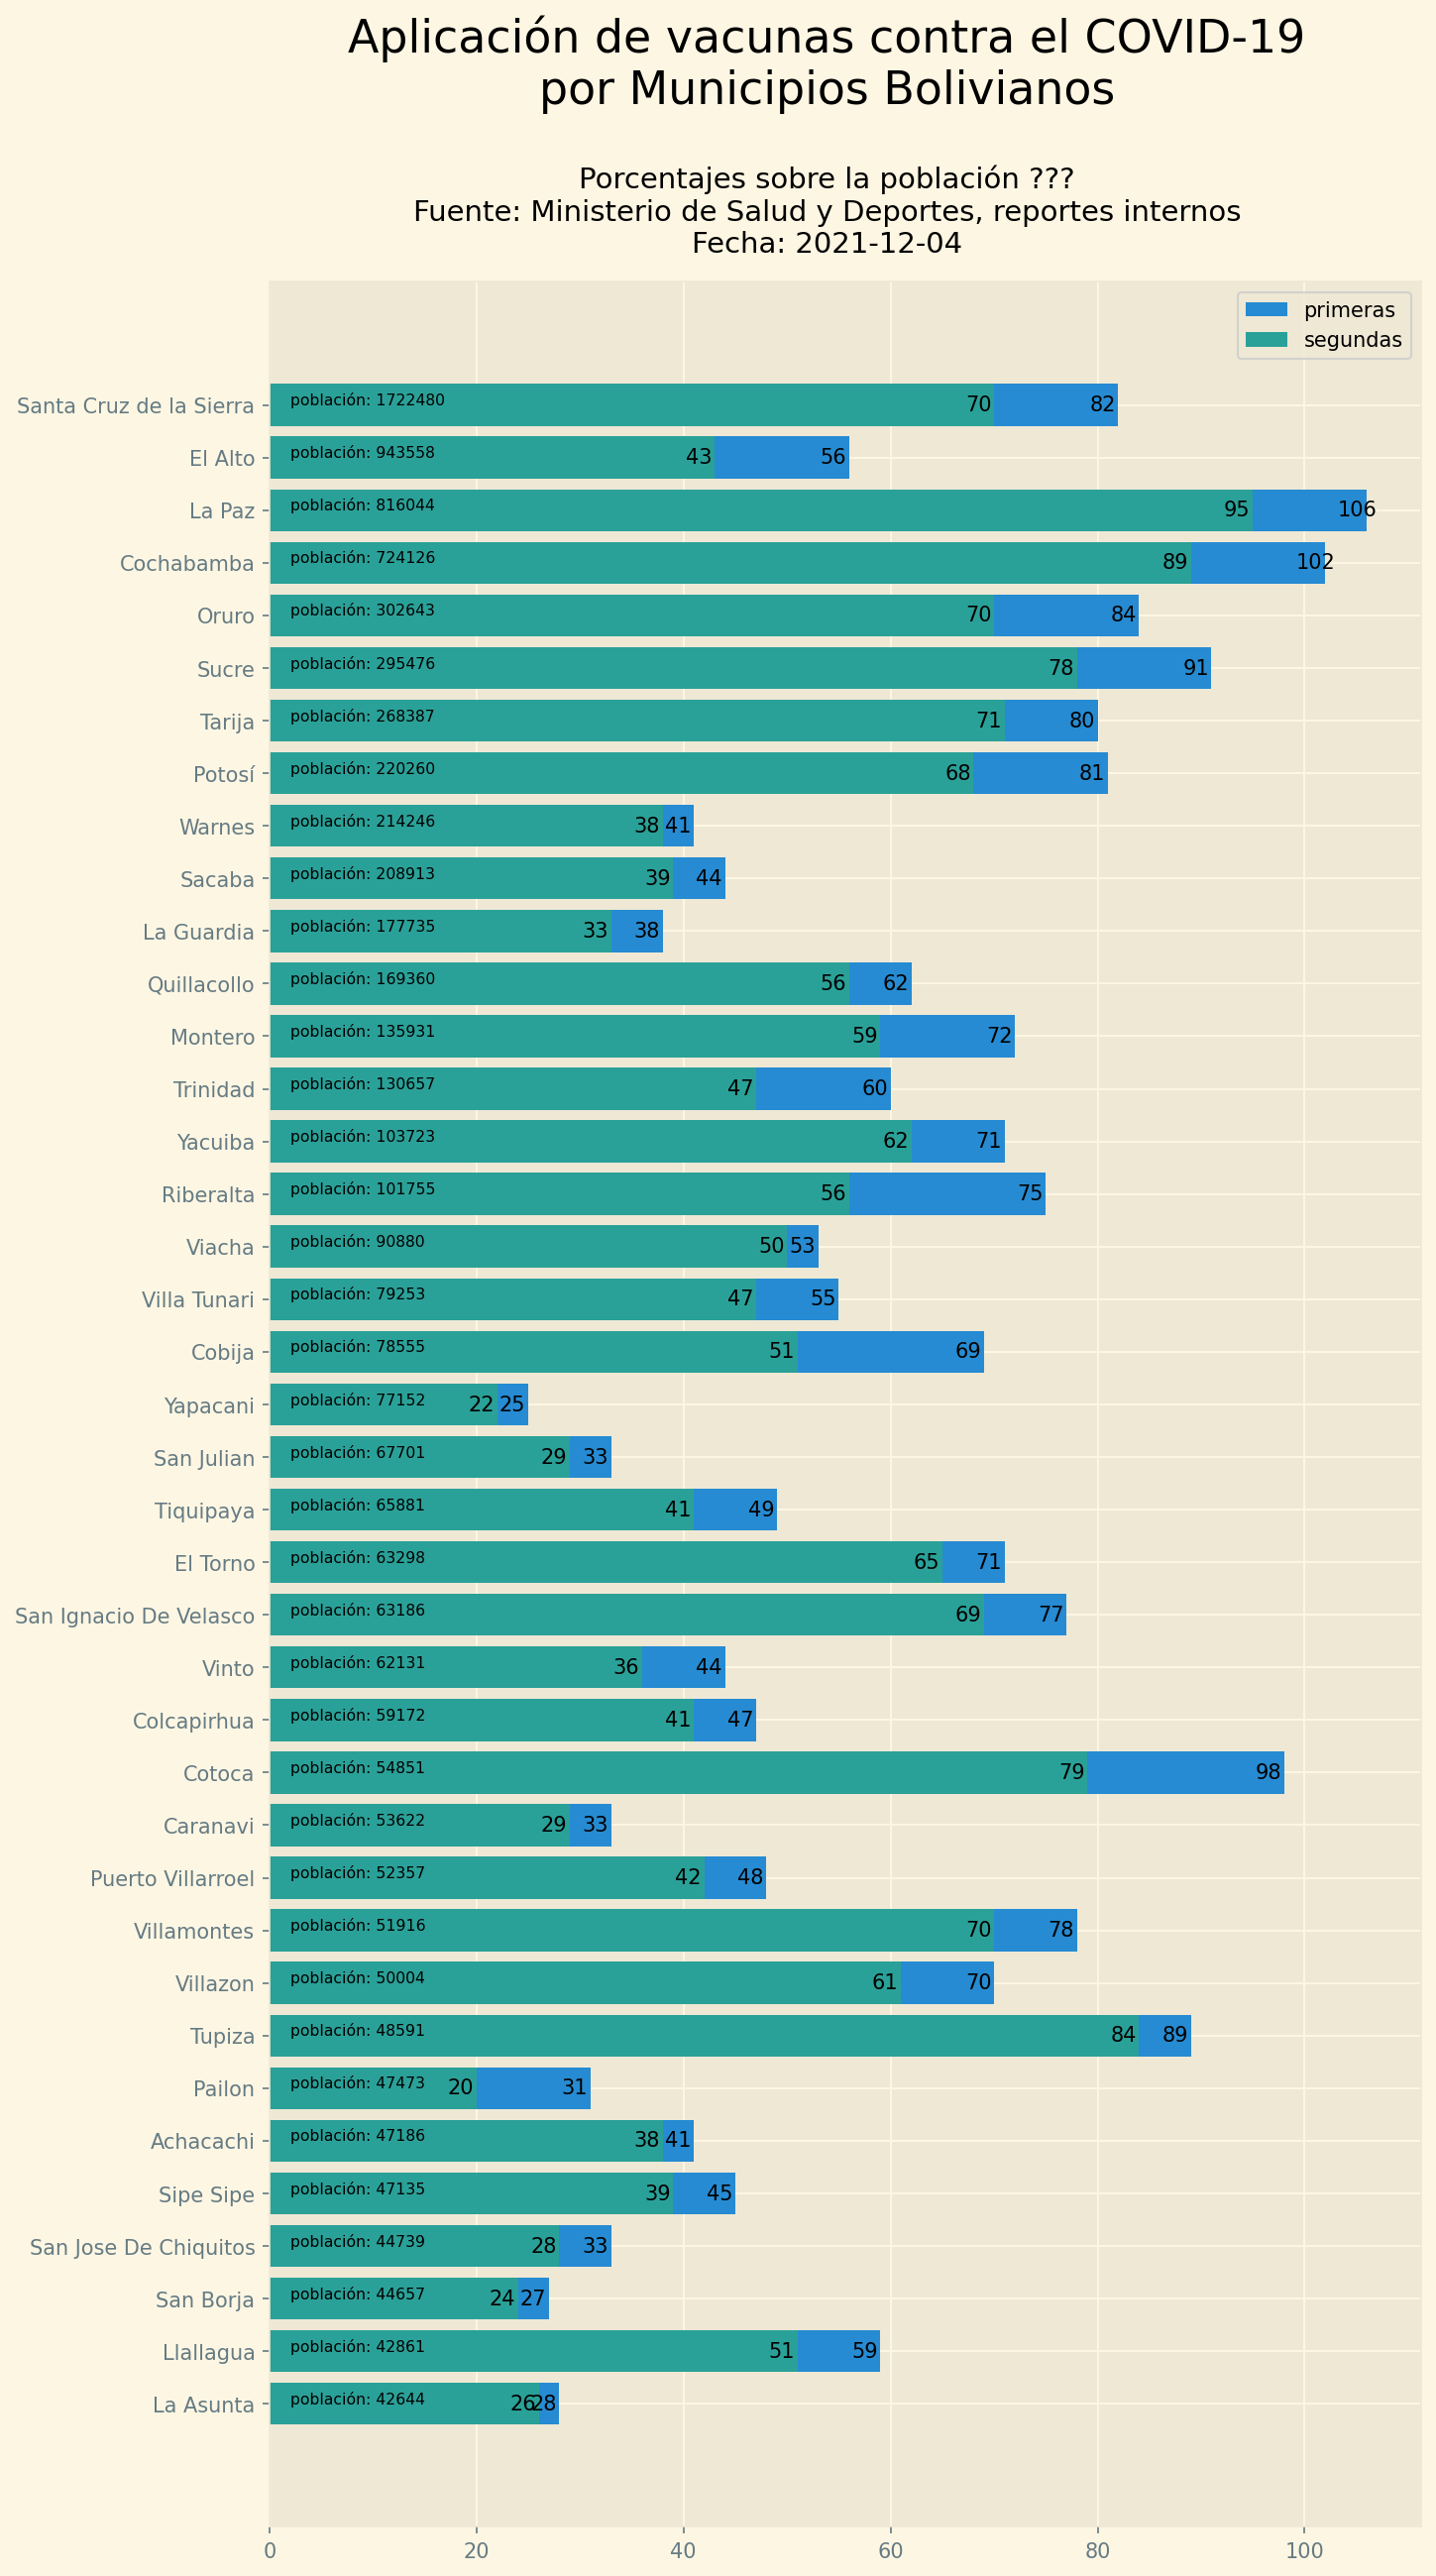

In [23]:
#top municipios, latest date
top = df_wide.sort_values("poblacion2020", ascending=False).municipio.unique()[:40]
df_top = df_wide[(df_wide.municipio.isin(top)) & (df_wide.fecha==str(latest_date))].sort_values("poblacion2020")

fig, axs = plt.subplots(1,1,figsize = (10,20), dpi=150)

fig.suptitle("Aplicación de vacunas contra el COVID-19\npor Municipios Bolivianos", fontsize=22, y=.97)
fig.text(.5,.89,s="Porcentajes sobre la población ???\nFuente: Ministerio de Salud y Deportes, reportes internos\nFecha: {}".format(str(latest_date)), ha="center", fontsize=14)

bar1 = axs.barh(df_top.municipio, df_top[1], label="primeras")
bar2 = axs.barh(df_top.municipio, df_top[2], label="segundas")

axs.bar_label(bar1, label_type='edge', padding=-14)
axs.bar_label(bar2, label_type='edge', padding=-14)

for i in range(len(df_top)):
    axs.annotate(s="población: "+str(df_top.poblacion2020.iloc[i]), 
                 xy=(2,i), fontsize=7.5
                )
axs.legend()

# MAPAS

In [24]:
df_map_merge = df_map.merge(df_wide, on='cod_ine')
df_map_merge.fecha = df_map_merge.fecha.apply(pd.to_datetime)

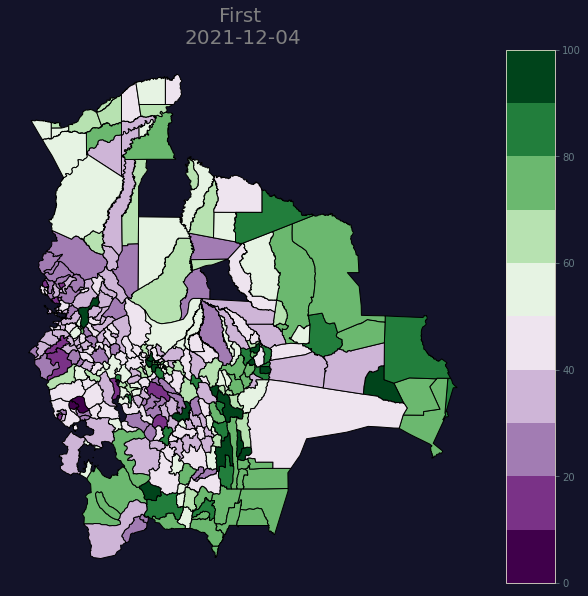

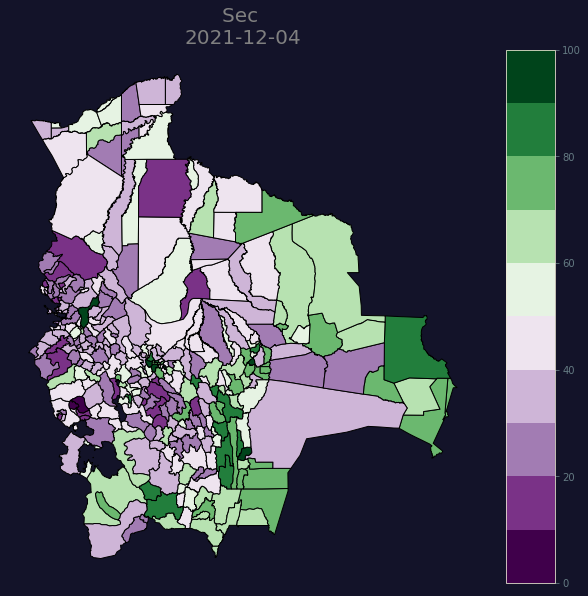

In [25]:
#latest date
def plot_single_map(dosis, subtitle):
    df_frame = df_map_merge.reset_index().groupby("fecha").get_group(str(latest_date))

    cmap = plt.get_cmap("PRGn", 10) #inferno, PiYG, PRGn, PuOr

    fig, axs = plt.subplots(1,1, figsize = (10,10))

    fig.set_facecolor("#131329")
    divider = make_axes_locatable(axs)
    cax = divider.append_axes("right", size="10%", pad=0.25)

    axs.set_title("{} \n{}".format(subtitle, str(latest_date)), fontsize = 20, color="gray")
    axs.axis("off")

    df_frame.plot(column=dosis, # chose dose here
                     ax=axs, 
                     legend=True, 
                     cax=cax, 
                     cmap=cmap,
                     facecolor="black", 
                     edgecolor="black",
                     norm=plt.Normalize(0, 100),
                 )
    

plot_single_map(dosis=1, subtitle='First')
plot_single_map(2, "Sec")

findfont: Font family ['Impact'] not found. Falling back to DejaVu Sans.


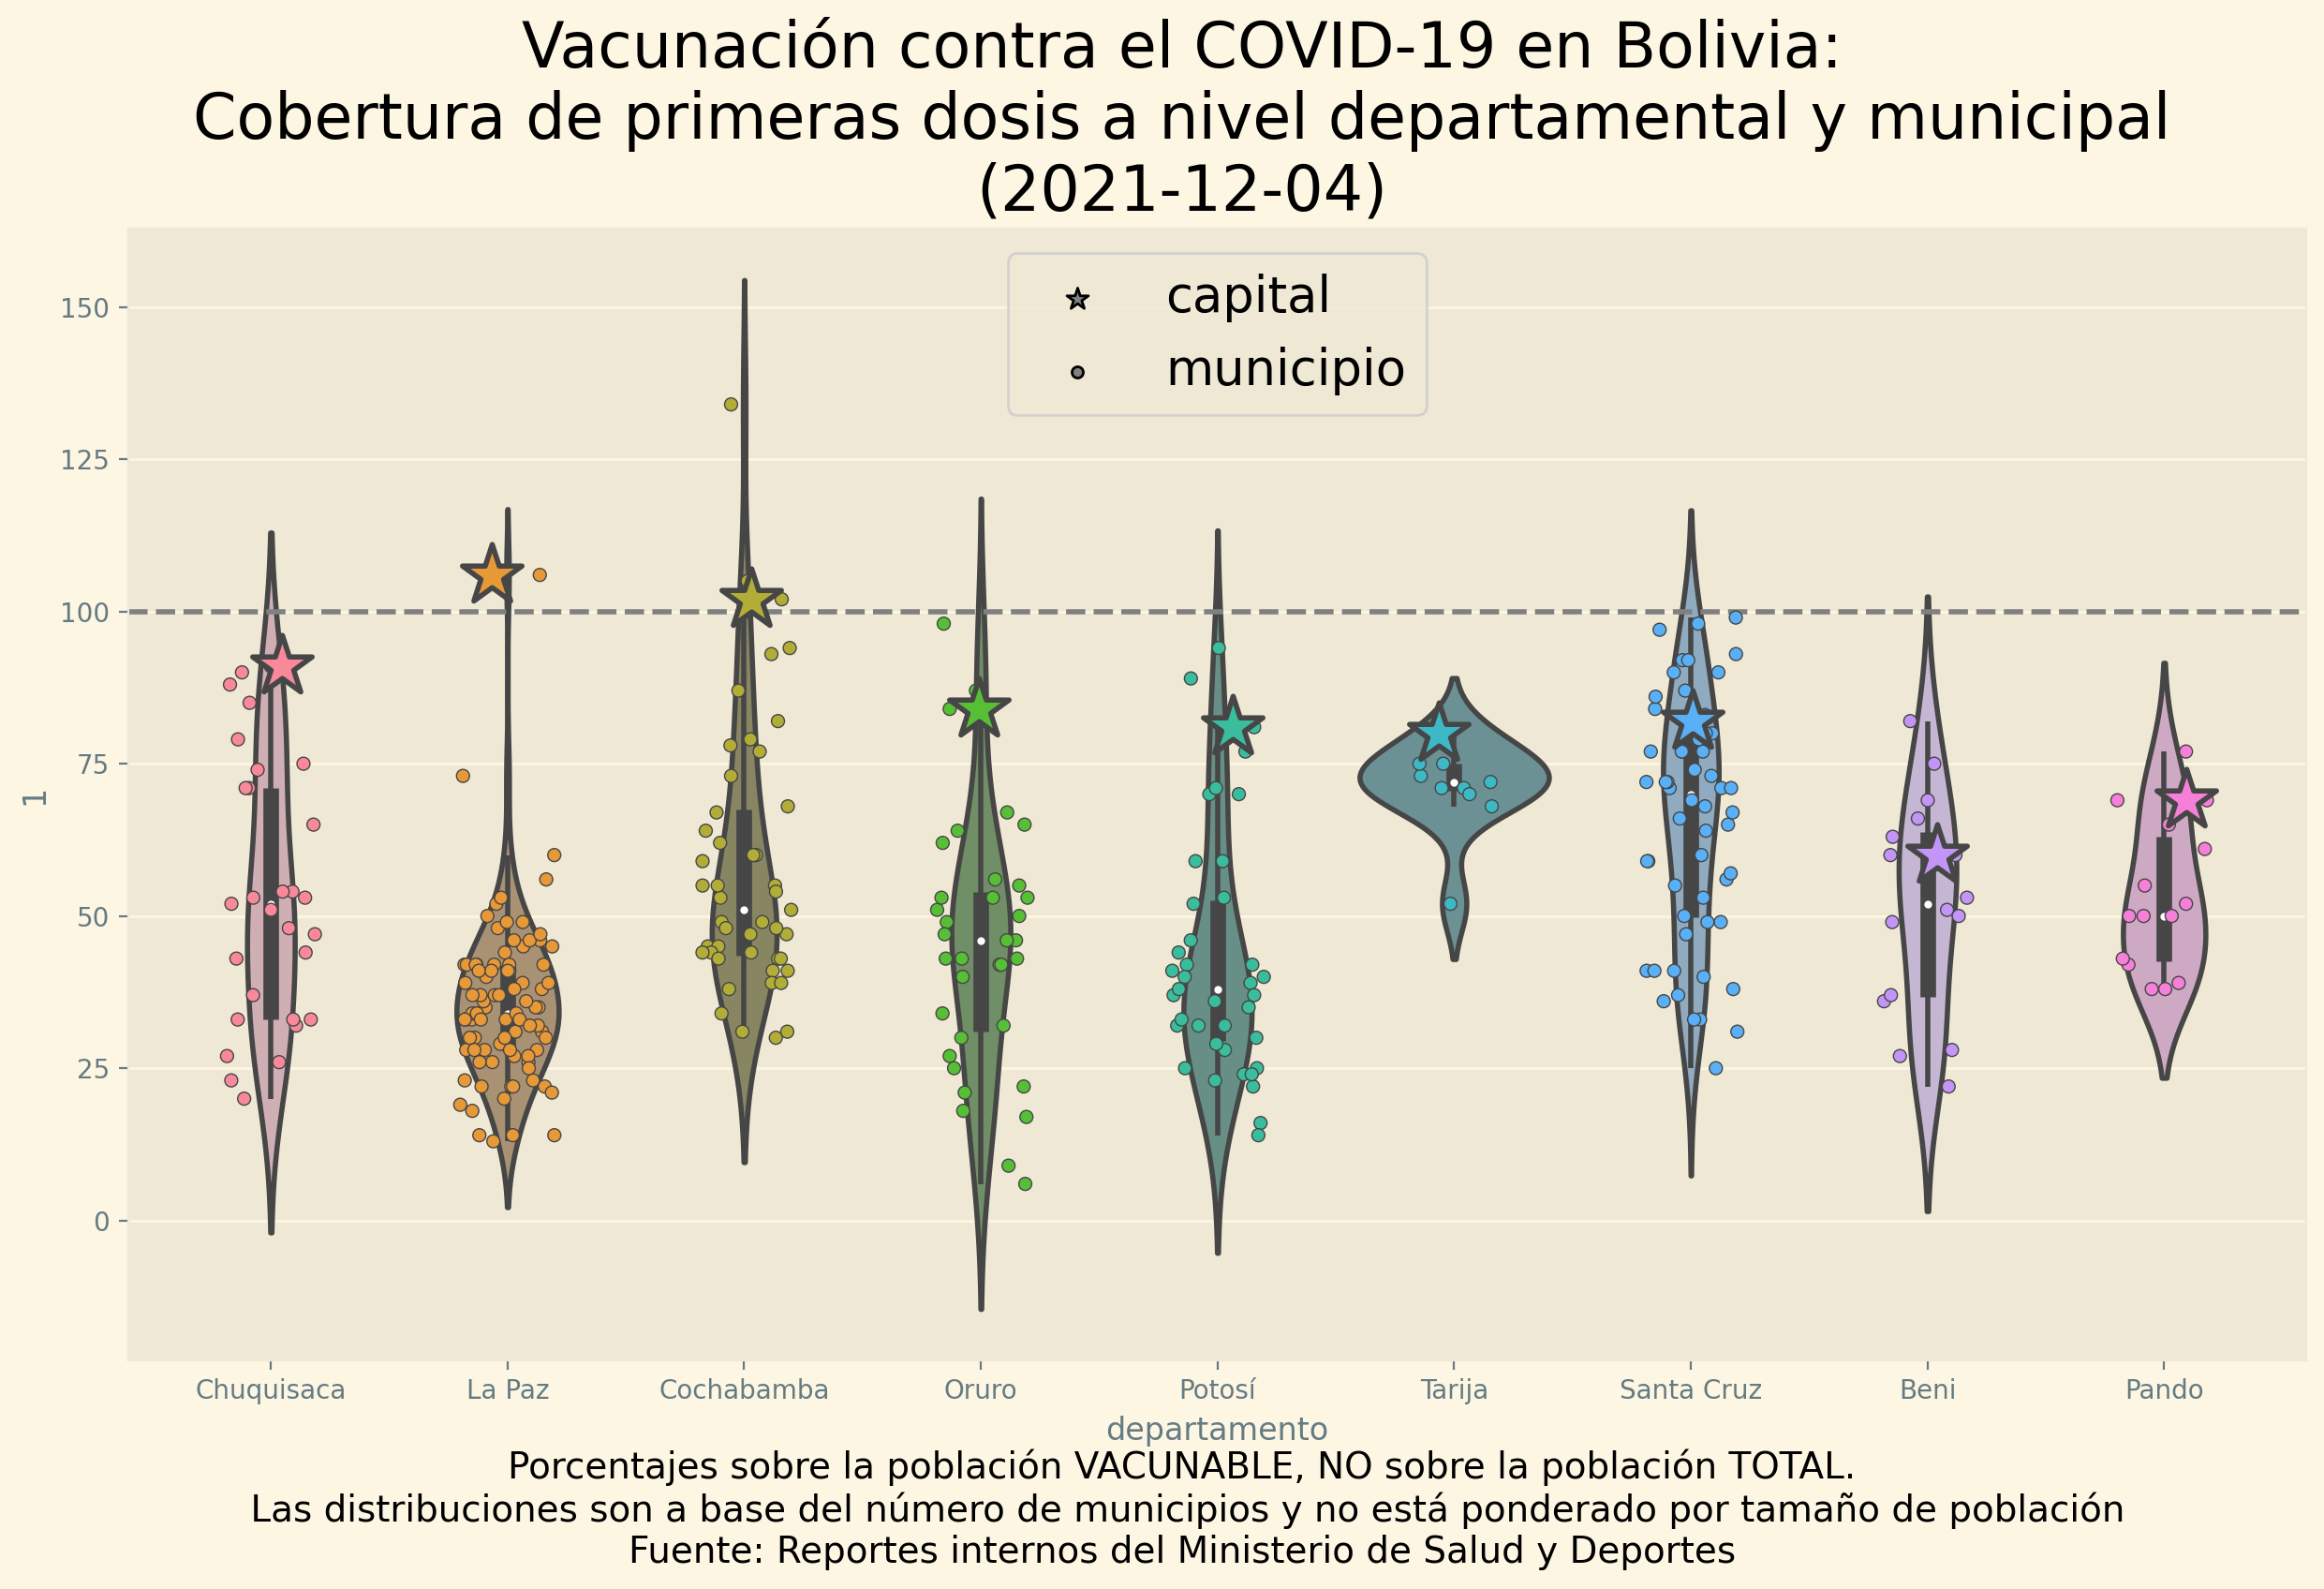

In [26]:
#define dataframe
df_latest = df_wide[df_wide.fecha==str(latest_date)]
dff_cap = df_latest[df_latest.cod_ine.apply(str).str.endswith("0101")]
dff_cap

# --------------

fig, axs = plt.subplots(1,1,figsize=(15,8), dpi=200)
fig.suptitle("Vacunación contra el COVID-19 en Bolivia:\nCobertura de primeras dosis a nivel departamental y municipal\n({})".format(str(latest_date)), fontsize=24, y=1.02)
fig.text(.5,-.01,s="Porcentajes sobre la población VACUNABLE, NO sobre la población TOTAL.\n Las distribuciones son a base del número de municipios y no está ponderado por tamaño de población\nFuente: Reportes internos del Ministerio de Salud y Deportes", ha="center", fontsize=14, fontname="Impact")

sns.violinplot(x="departamento", y = 1, data = df_latest, ax=axs, saturation=.3)
sns.stripplot(x="departamento", y = 1, data = df_latest, ax=axs, jitter=.2, linewidth=.5)
sns.stripplot(x="departamento", y = 1, data = dff_cap, ax=axs, s=24, marker="*", linewidth=2)

axs.axhline(100, linestyle="--", color="grey")

#only for legend
marker = plt.scatter([], [], linewidth=1, edgecolor="Black", s=75,
                     c='gray', marker='*', label="capital")
marker = plt.scatter([], [], linewidth=1, edgecolor="Black", s=75,
                     c='gray', marker='.', label="municipio")

axs.legend(fontsize=19, loc="upper center")
fig.savefig("figures/violin_departamentos.jpg")